In [1]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
warnings.filterwarnings('ignore')

# Data Reading and Data Exploration 

In [2]:
data = pd.read_csv(r"C:\Users\anant\Downloads\DS3_C2_S4_Regression_Practice_WhiteWine_Data.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.shape

(4898, 12)

In [4]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Checking for Singularity

In [6]:
data.quality.value_counts() / len(data)

6    0.448755
5    0.297468
7    0.179665
8    0.035729
4    0.033279
3    0.004083
9    0.001021
Name: quality, dtype: float64

# Required Functions for Data Splitting and Visualization

In [51]:
def splitdata(data,y,ratio=0.3):
    trainx,testx,trainy,testy = train_test_split(data.drop(y,1), data[y],test_size=ratio)
    
    return(trainx,trainy,testx,testy)

In [52]:
y = 'alcohol'
nc=list(data.columns)
nc.remove(y)
print(nc)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'quality']


In [53]:
def plotdata(data,nc,ctype):
    if ctype not in ['h','b','m']:
        ret = 'Invalid chart type'.format(ctype)
        return(ret)
    
    if (ctype=='m'):
        cor = data.corr()
        cor = np.tril(cor)
        plt.figure(figsize=(12,8))
        plt.title('Correlation matrix')
        sns.heatmap(cor,xticklabels=nc,yticklabels=nc,vmin=-1,vmax=1,annot=True)
    
    else:
        COLS = 2
        ROWS = int(np.ceil(len(nc)/2))
        POS = 1
        fig,ax=plt.subplots(ROWS,COLS,figsize=(15,10))
        
        for c in nc:
            fig.add_subplot(ROWS,COLS,POS)
            if(ctype=='h'):
                sns.histplot(data[c],bins=20,color='green')
            else:
                sns.boxplot(data[c],color='yellow')
                
            POS+=1

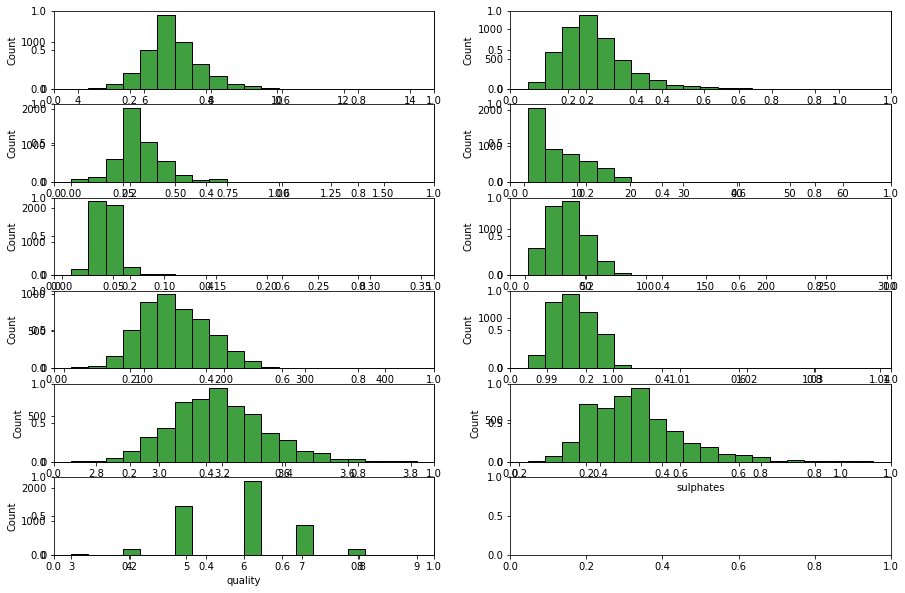

In [54]:
plotdata(data,nc,'h')

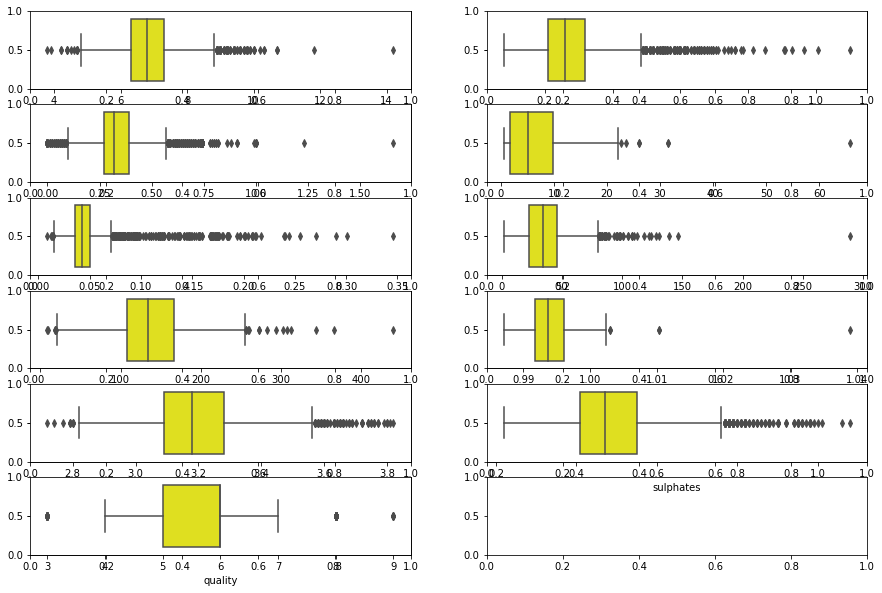

In [55]:
plotdata(data,nc,'b')

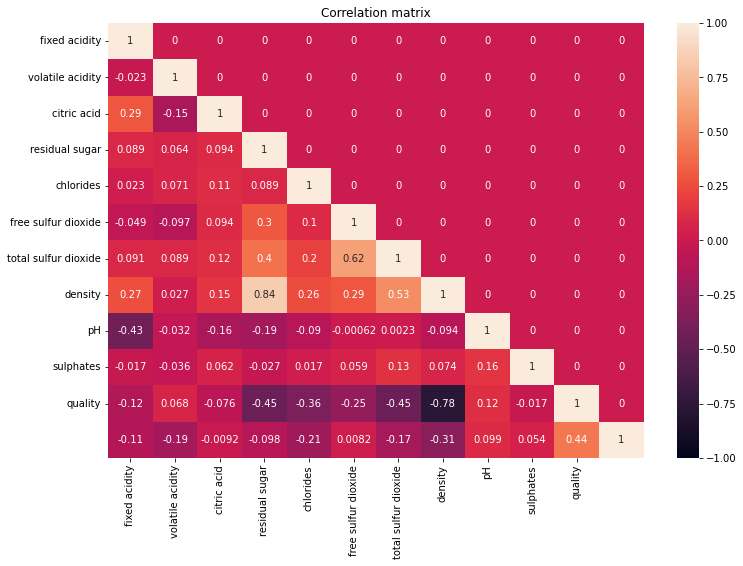

In [56]:
plotdata(data,nc,'m')

# Data Normalization

In [57]:
mm = MinMaxScaler()

In [58]:
data_tr = data.copy()
data_tr.iloc[:,:]=mm.fit_transform(data.iloc[:,:])
data_tr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5


In [59]:
data_tr.alcohol = data.alcohol
data_tr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,8.8,0.5
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,9.5,0.5
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,10.1,0.5
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,9.9,0.5
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,9.9,0.5


## Data Visualisation of Normalised data

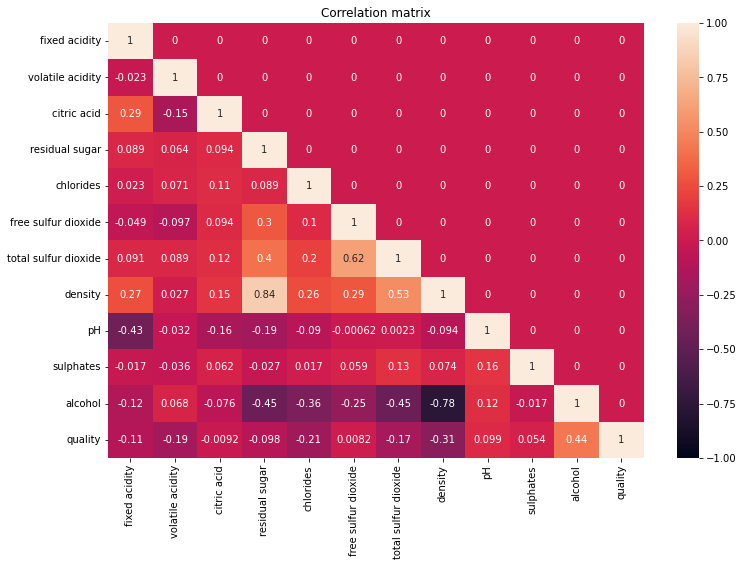

In [60]:
plotdata(data_tr,data_tr.columns,'m')

# Data Splitting

In [61]:
trainx1,trainy1,testx1,testy1 = splitdata(data_tr,y)

In [62]:
print('trainx={},trainy={},testx={},testy={}'.format(trainx1.shape, trainy1.shape, testx1.shape, testy1.shape))

trainx=(3428, 11),trainy=(3428,),testx=(1470, 11),testy=(1470,)


In [63]:
trainx1.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
4576,0.201923,0.215686,0.174699,0.007669,0.080119,0.073171,0.109049,0.063428,0.427273,0.186047,0.333333
983,0.182692,0.274510,0.204819,0.055215,0.050445,0.066202,0.157773,0.069211,0.627273,0.267442,0.500000
3801,0.432692,0.098039,0.180723,0.007669,0.071217,0.062718,0.111369,0.076730,0.272727,0.337209,0.500000


In [64]:
trainy1.head(3)

4576    11.3
983     11.9
3801    11.0
Name: alcohol, dtype: float64

In [65]:
testx1.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
3246,0.288462,0.137255,0.246988,0.093558,0.074184,0.128920,0.248260,0.102950,0.418182,0.279070,0.500000
2533,0.250000,0.137255,0.180723,0.162577,0.109792,0.177700,0.324826,0.148062,0.445455,0.139535,0.333333
1633,0.346154,0.107843,0.295181,0.093558,0.083086,0.045296,0.234339,0.128976,0.436364,0.186047,0.666667


In [66]:
testy1.head(3)

3246    11.5
2533    10.8
1633    11.0
Name: alcohol, dtype: float64

# Data Modelling

### Required Functions for Building Model

In [67]:
def compilemodel(units,shape,loss):
    model = tf.keras.Sequential([
        Dense(units,activation='relu',input_shape=[shape]), #HL1
        Dense(units,activation='relu'), #HL2
        Dense(units,activation='relu'), #HL3
        Dense(1,activation='relu') #output layer
    ]) 
    
    #compiling the model

    model.compile(loss=loss,optimizer='adam',metrics=[RMSE]) 
    
    return(model)

In [68]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,lags):
        if epoch%25 == 0:
            print('.',end=' ')


def fitmodel(model,trainx,trainy,epoch,valsplit=0.2):
    errors = model.fit(trainx,trainy,epochs=epoch,validation_split=valsplit,verbose=0,callbacks=[PrintDot()])
    
    errhistory = pd.DataFrame(errors.history)
    return(errhistory)

In [69]:
#initilise values
nodes=20
shape=len(trainx1.columns)

#loss functions
MSE=tf.keras.losses.MeanSquaredError()
MAE=tf.keras.losses.MeanAbsoluteError()
RMSE=tf.keras.metrics.RootMeanSquaredError()

### Building and Fitting of a Model

In [70]:
EPOCHS =100
m1 = compilemodel(nodes,shape,MSE)

In [71]:
e1 = fitmodel(m1,trainx1,trainy1,EPOCHS)

. . . . 

In [72]:
e1.columns

Index(['loss', 'root_mean_squared_error', 'val_loss',
       'val_root_mean_squared_error'],
      dtype='object')

In [73]:
#rename the columns
e1=e1.rename(columns={'loss':'train_loss','root_mean_squared_error':'train_rmse',
                      'val_root_mean_squared_error':'val_rmse'})

In [74]:
e1.head()

,train_loss,train_rmse,val_loss,val_rmse
0,93.895805,9.689984,54.831882,7.404855
1,12.955843,3.599423,3.247058,1.801960
2,2.699075,1.642886,2.810467,1.676445
3,2.287273,1.512373,2.311490,1.520359
4,1.829549,1.352608,1.785847,1.336356


In [75]:
#add new column epoch to the dataframe
e1['epoch']=e1.index

In [76]:
e1.head()

,train_loss,train_rmse,val_loss,val_rmse,epoch
0,93.895805,9.689984,54.831882,7.404855,0
1,12.955843,3.599423,3.247058,1.801960,1
2,2.699075,1.642886,2.810467,1.676445,2
3,2.287273,1.512373,2.311490,1.520359,3
4,1.829549,1.352608,1.785847,1.336356,4


## Plotting of Errors

In [77]:
def ploterrors(errhist):
    plt.figure(figsize=(8,6))
    
    plt.plot(errhist.epoch,errhist.train_rmse,label='Train RMSE')
    plt.plot(errhist.epoch,errhist.val_rmse,label='Validation RMSE')
    plt.xlabel('Epoch')
    plt.ylabel('Errors')
    plt.title('RMSE Comparision')
    plt.legend()

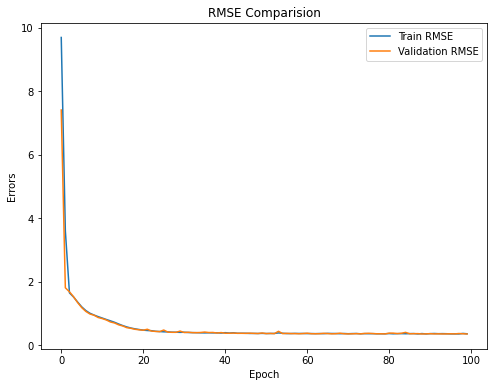

In [78]:
ploterrors(e1)

## Predicting on test data

In [79]:
def predictY(model,testx,testy):
    predictions = model.predict(testx).flatten() #convert pred into 1d array
    
    df=pd.DataFrame({'actual':testy,'predicted':predictions,'err':testy-predictions})
    return(df)

In [80]:
df1 = predictY(m1,testx1,testy1)
df1.head(10)

,actual,predicted,err
3246,11.50,11.707508,-0.207508
2533,10.80,10.776967,0.023033
1633,11.00,10.988394,0.011606
4701,10.10,10.038837,0.061163
4496,11.45,11.801725,-0.351725
4680,10.20,9.914419,0.285581
1964,9.00,9.298980,-0.298980
3067,10.70,10.840823,-0.140823
812,9.10,9.861915,-0.761915
1416,10.00,10.007277,-0.007277


## Evaluating the model

In [81]:
def printMSE(actual,predicted,modelname):
    mse=mean_squared_error(df1.actual,df1.predicted)
    print('model {} Epoch={}\n\tMSE={}\n\tRMSE={}'.format(modelname,EPOCHS,mse,np.sqrt(mse)))
    return(mse)

In [82]:
mse1=printMSE(df1.actual,df1.predicted,'m1')
mse1

model m1 Epoch=100
	MSE=0.18002257724062118
	RMSE=0.4242906754108805


0.18002257724062118

## Plotting the Best Fit Line

In [83]:
def plotbestfitline(actual,predicted,modelname=''):
    plt.figure(figsize=(8,5))
    plt.title('Best fit Line'+modelname)
    sns.regplot(x=actual,y=predicted,marker='.',color='yellow',line_kws={'color':'red'})

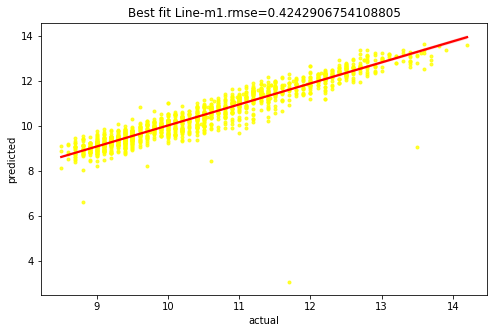

In [84]:
plotbestfitline(df1.actual,df1.predicted,'-m1.rmse='+str(np.sqrt(mse1)))

# Model 2

In [88]:
EPOCHS=2000
m2=compilemodel(nodes,shape,MSE)

In [89]:
e2 = fitmodel(m2,trainx1,trainy1,EPOCHS)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

model m2 Epoch=2000
	MSE=0.18002257724062118
	RMSE=0.4242906754108805


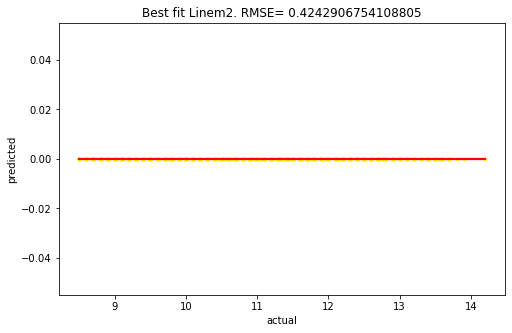

In [90]:
df2 = predictY(m2,testx1,testy1)
mse2 =printMSE(df2.actual,df2.predicted,'m2')
plotbestfitline(df2.actual,df2.predicted,'m2. RMSE= '+str(np.sqrt(mse2)))